<div class="alert alert-block alert-info">
Visit the <a href="https://github.com/engs1258/biomedical-image-analysis-notebooks/wiki">wiki</a> pages to find some additional documentation and instructions on how view an interactive verson of these notebooks using binder.</div>

---

In [1]:
%matplotlib inline

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt


from skimage import data
from skimage.color import rgb2gray
from skimage import io
from skimage import transform
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB)#, plot_matches)
import skimage

## Detecting feature points in an image using ORB

Here we use the ORB feature detector as an alternative to highlight the principle of matching feature points. 

In [4]:
rgb_image = io.imread("../images/mickey-mouse-image.jpg")
image = rgb2gray(rgb_image)
tform = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.7,
                                  translation=(0, -200))
image_t = transform.warp(image, tform)

Text(0.5, 1.05, 'original image')

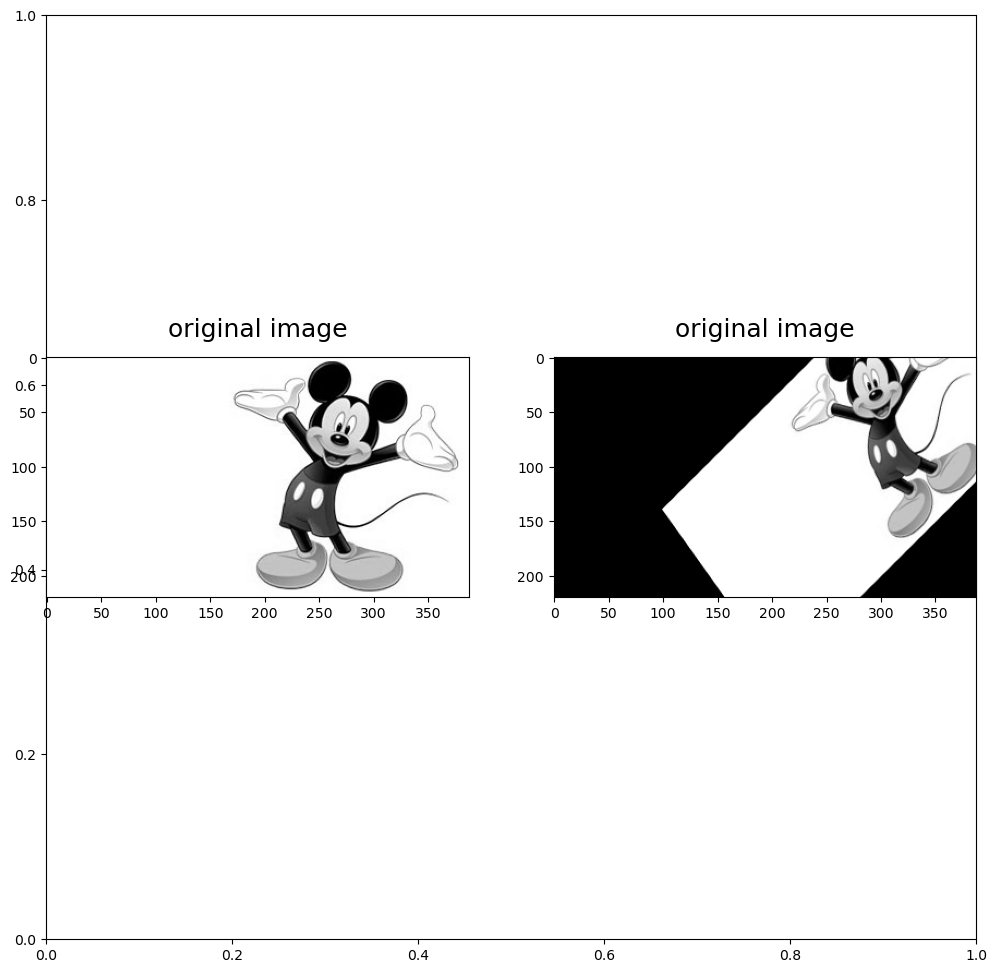

In [5]:
ffig, ax = plt.subplots(figsize=(12, 12))
ax = plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
ax.set_title('original image', y=1.05, fontsize=18)

ax = plt.subplot(1,2,2)
plt.imshow(image_t, cmap='gray')
ax.set_title('original image', y=1.05, fontsize=18)

## Apply the keypoint detector

In [6]:
NK = 50
descriptor_extractor = ORB(n_keypoints=NK)

descriptor_extractor.detect_and_extract(image)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(image_t)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

matches = match_descriptors(descriptors1, descriptors2, cross_check=True)

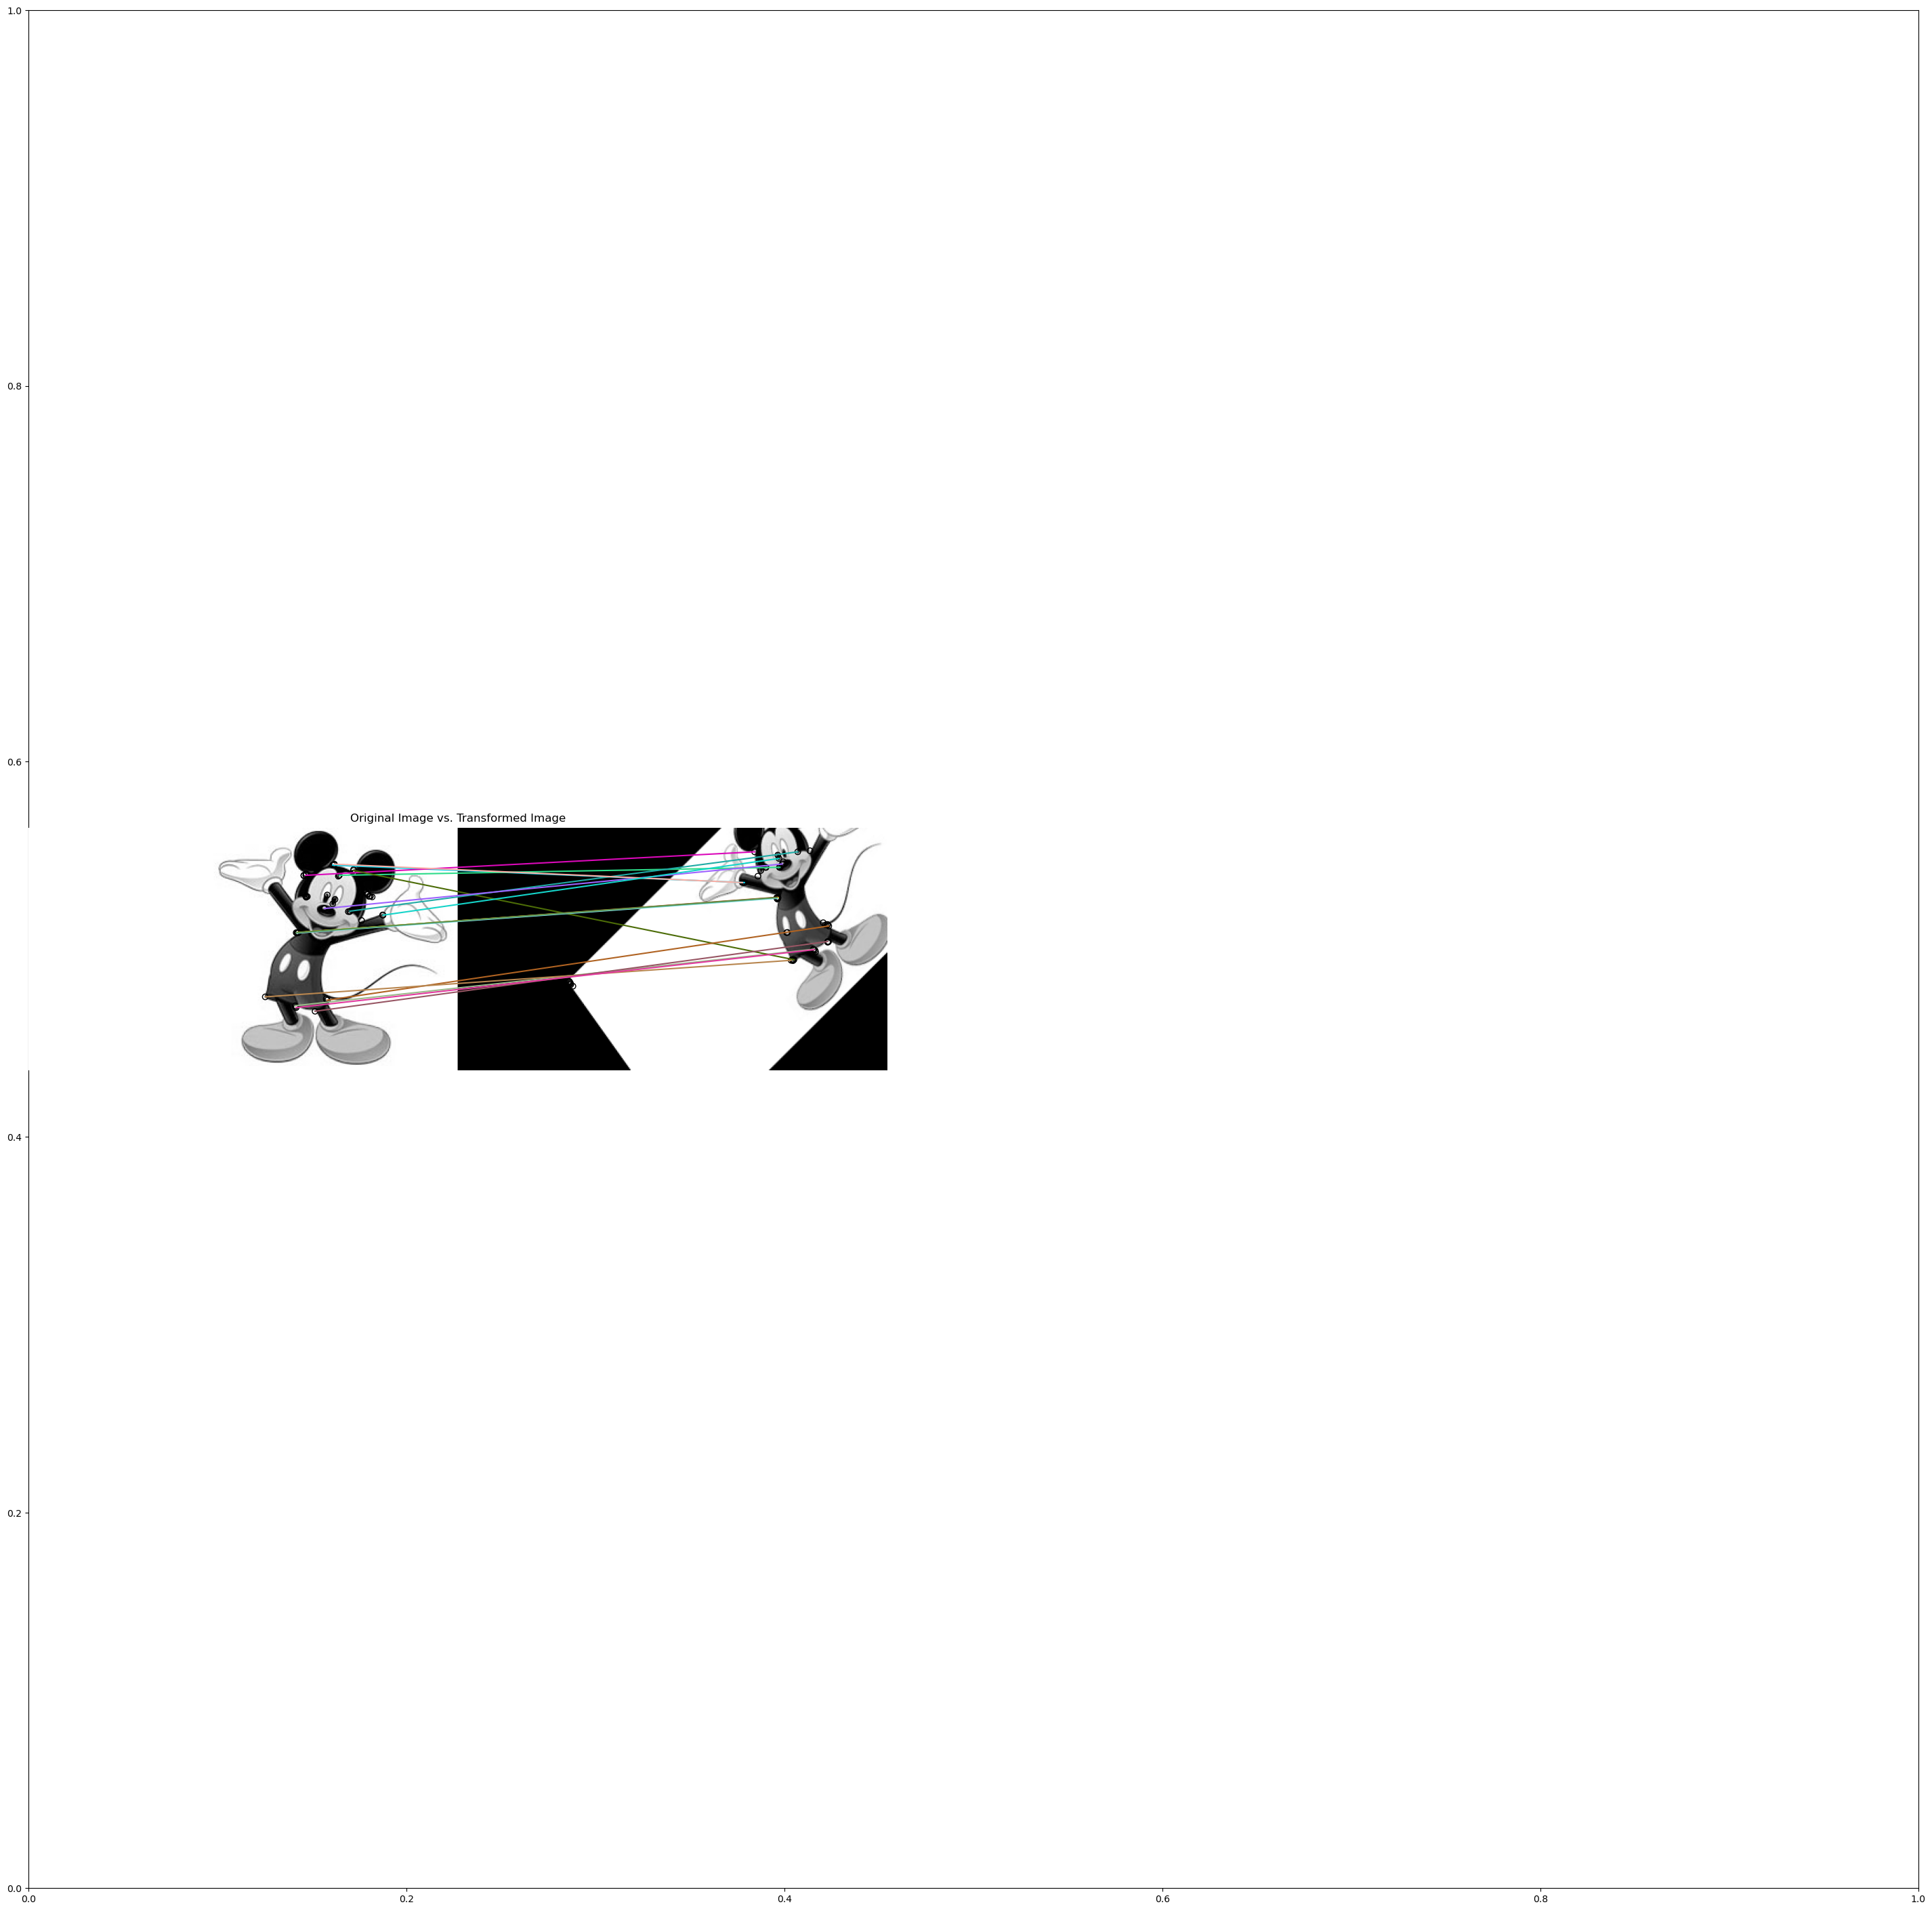

In [10]:
ffig, ax = plt.subplots(figsize=(36, 36))
ax = plt.subplot(1,2,1)
skimage.feature.plot_matched_features(ax=ax, image0=image, image1=image_t, keypoints0=keypoints1, keypoints1=keypoints2, matches=matches)
ax.axis('off')
ax.set_title("Original Image vs. Transformed Image")


plt.show()

<div class="alert alert-block alert-success"> 
    <b>Explore: </b> Replace the cartoon image used where with some of the medical images that are being provided. Observe how well the feature points are matched. Vary the value of parameter NK.</div>